In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation
from sklearn.semi_supervised import LabelSpreading
import pandas as pd

rng = np.random.RandomState(0)

In [2]:
metro_data = pd.read_csv('metro_summary_data.csv')
sorted_metro_data = metro_data.sort_values('PercentTech', ascending=False)

In [92]:
sorted_metro_data

,Unnamed: 0,CBSA,TotalPeople,TotalTech,MedianAge,PercentHighSchool,PercentCollege,PercentPostGrad,MedianIncome,PercentFemale,PercentBornOutOfState,PercentImmigrant,Percent18to35,PercentTech,MedianRent,MedianHouseValue,DiversityIndex,LogMedianRent,LogMedianHouseValue,LogTotalPeople
204,205,"San Jose-Sunnyvale-Santa Clara, CA",1916862,114373,37.000000,0.677346,0.353995,0.160663,30000.000000,0.496868,0.546244,0.400493,0.255370,5.966679,1800.000000,800000.000000,0.701149,7.495542,13.592367,14.466200
131,132,"Madison, WI",523793,20891,35.000000,0.757956,0.369048,0.129826,30000.000000,0.502044,0.409666,0.104973,0.299702,3.988408,850.000000,230000.000000,0.344415,6.745236,12.345835,13.168852
26,27,"Bloomington, IL",173828,6648,33.000000,0.747929,0.292554,0.098655,25000.000000,0.511373,0.257571,0.059944,0.325857,3.824470,700.000000,165000.000000,0.347239,6.551080,12.013701,12.065822
17,18,"Austin-Round Rock, TX",1881313,68831,34.000000,0.684594,0.302374,0.101011,27200.000000,0.499367,0.466017,0.170215,0.293115,3.658668,950.000000,240000.000000,0.609035,6.856462,12.388394,14.447480
185,186,"Raleigh, NC",1209514,42795,36.000000,0.678530,0.312101,0.109033,27000.000000,0.511799,0.533912,0.136046,0.249252,3.538198,830.000000,225000.000000,0.565302,6.721426,12.323856,14.005729
203,204,"San Francisco-Oakland-Hayward, CA",4656199,164574,38.000000,0.707027,0.354305,0.136603,30000.000000,0.507558,0.515518,0.324769,0.255497,3.534514,1500.000000,700000.000000,0.715049,7.313220,13.458836,15.353710
211,212,"Seattle-Tacoma-Bellevue, WA",3735393,126339,37.000000,0.719753,0.297356,0.103938,30000.000000,0.500339,0.551715,0.200753,0.263899,3.382214,1100.000000,350000.000000,0.543487,7.003065,12.765688,15.133364
230,231,"Trenton, NJ",370588,12258,38.000000,0.689709,0.271919,0.131127,23503.174603,0.506789,0.479295,0.245653,0.249377,3.307716,1000.000000,275000.000000,0.661787,6.907755,12.524526,12.822846
239,240,"Washington-Arlington-Alexandria, DC-VA-MD-WV",3780523,121278,36.000000,0.701644,0.368529,0.177054,35000.000000,0.516928,0.701891,0.249536,0.272231,3.207969,1400.000000,380000.000000,0.703098,7.244228,12.847927,15.145373
36,37,"Cedar Rapids, IA",220052,6407,37.000000,0.728519,0.221230,0.067529,27874.691358,0.509143,0.262711,0.046366,0.248941,2.911585,550.000000,145000.000000,0.229208,6.309918,11.884489,12.301619


In [4]:
sorted_metro_data['LogMedianRent'] = np.log(sorted_metro_data['MedianRent'])
sorted_metro_data['LogMedianHouseValue'] = np.log(sorted_metro_data['MedianHouseValue'])
sorted_metro_data['LogTotalPeople'] = np.log(sorted_metro_data['TotalPeople'])

In [86]:
array2 = sorted_metro_data.as_matrix(['PercentCollege', 'PercentFemale'])

test_labels = [-1, -1, -1, 1, 1, 1, 1, 1, 1]
rng.shuffle(test_labels)

end_labels = [-1] * (array2.shape[0] - 15) + [0] * 6
rng.shuffle(end_labels)


labels2 = np.asarray(test_labels + end_labels)

prop2 = label_propagation.LabelPropagation(kernel='knn', n_neighbors=7, max_iter=100, alpha=1).fit(array2, labels2)
model_results = prop2.predict(array2)
#np.where(np.asarray(prop2[1]) > 0)
model_results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
indices = np.where(np.asarray(model_results) > 0)
sorted_metro_data.iloc[indices]['CBSA']

Series([], Name: CBSA, dtype: object)

In [9]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)




1

In [106]:
bootstrap_model_results = []
for i in range(0, 1000):
    array2 = sorted_metro_data.as_matrix(['PercentCollege', 'Percent18to35'])

    test_labels = [-1, -1, -1, 1, 1, 1, 1, 1, 1]
    rng.shuffle(test_labels)

    end_labels = [-1] * (array2.shape[0] - 15) + [0] * 6
    rng.shuffle(end_labels)


    labels2 = np.asarray(test_labels + end_labels)

    prop2 = label_propagation.LabelPropagation(kernel='knn', n_neighbors=7, max_iter=100, alpha=1).fit(array2, labels2)
    model_results = prop2.predict(array2)
    #np.where(np.asarray(prop2[1]) > 0)
    bootstrap_model_results.append(model_results)

probabilities = np.array([0 for x in range(0, len(bootstrap_model_results[1]))])
for vec in bootstrap_model_results:
    probabilities = np.add(vec / 1000, probabilities)
probabilities
    

array([ 0.654,  0.621,  0.485,  0.589,  0.663,  0.654,  0.663,  0.66 ,
        0.633,  0.001,  0.663,  0.001,  0.025,  0.026,  0.027,  0.008,
        0.594,  0.662,  0.025,  0.458,  0.023,  0.621,  0.026,  0.662,
        0.66 ,  0.658,  0.657,  0.657,  0.001,  0.656,  0.133,  0.   ,
        0.014,  0.027,  0.011,  0.662,  0.073,  0.001,  0.66 ,  0.44 ,
        0.026,  0.622,  0.001,  0.026,  0.001,  0.655,  0.001,  0.005,
        0.654,  0.654,  0.038,  0.001,  0.44 ,  0.001,  0.011,  0.662,
        0.001,  0.024,  0.003,  0.   ,  0.662,  0.001,  0.   ,  0.658,
        0.592,  0.001,  0.001,  0.   ,  0.001,  0.   ,  0.006,  0.001,
        0.529,  0.001,  0.001,  0.024,  0.652,  0.659,  0.   ,  0.001,
        0.001,  0.   ,  0.001,  0.004,  0.014,  0.002,  0.005,  0.   ,
        0.015,  0.001,  0.001,  0.001,  0.001,  0.   ,  0.   ,  0.358,
        0.   ,  0.026,  0.   ,  0.001,  0.001,  0.   ,  0.001,  0.001,
        0.001,  0.001,  0.001,  0.   ,  0.   ,  0.   ,  0.001,  0.001,
      

(array([ 17.,   1.,   0.,   0.,   2.,   1.,   3.,   3.,   4.,  29.]),
 array([ 0.021 ,  0.0852,  0.1494,  0.2136,  0.2778,  0.342 ,  0.4062,
         0.4704,  0.5346,  0.5988,  0.663 ]),
 <a list of 10 Patch objects>)

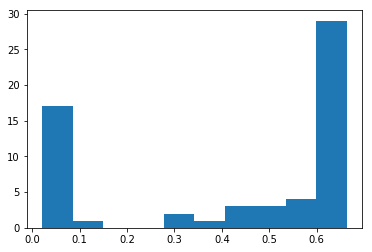

In [108]:
plt.hist(probabilities[probabilities > 0.02])

In [109]:
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

similarities2 = euclidean_distances(array2)

seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities2).embedding_
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities2, init=pos)

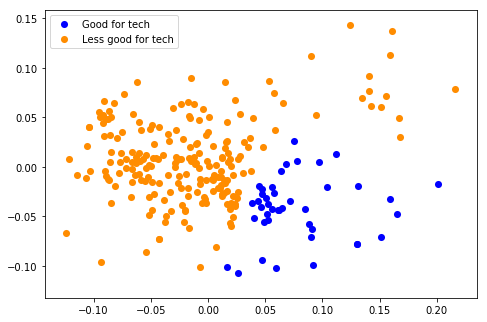

In [115]:
%matplotlib inline
# Rescale the data
pos *= np.sqrt((array2 ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((array2 ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
array2 = clf.fit_transform(array2)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 50
plt.scatter(npos[np.where(np.asarray(probabilities) >= 0.3), 0], npos[np.where(np.asarray(probabilities) >= 0.3), 1], color='blue', s=s, lw=0, label='Good for tech')
plt.scatter(npos[np.where(np.asarray(probabilities) < 0.3), 0], npos[np.where(np.asarray(probabilities) < 0.3), 1], color='darkorange', s=s, lw=0, label='Less good for tech')

plt.legend(scatterpoints=1, loc='best', shadow=False)

In [116]:
indices = np.where(np.asarray(probabilities) >= 0.5)
sorted_metro_data.iloc[indices]['CBSA']

204                San Jose-Sunnyvale-Santa Clara, CA
131                                       Madison, WI
17                              Austin-Round Rock, TX
185                                       Raleigh, NC
203                 San Francisco-Oakland-Hayward, CA
211                       Seattle-Tacoma-Bellevue, WA
230                                       Trenton, NJ
239      Washington-Arlington-Alexandria, DC-VA-MD-WV
141           Minneapolis-St. Paul-Bloomington, MN-WI
71                                   Fort Collins, CO
19                      Baltimore-Columbia-Towson, MD
58                             Durham-Chapel Hill, NC
189                                      Richmond, VA
106                                Kansas City, MO-KS
38                  Charlotte-Concord-Gastonia, NC-SC
165                       Omaha-Council Bluffs, NE-IA
192                                     Rochester, NY
46                                       Columbus, OH
178               Portland-V

In [121]:
indices = np.where(np.asarray(probabilities) >= 0.5)
good_for_tech = sorted_metro_data.iloc[indices]

In [144]:
import pymysql.cursors

user = 'kkutchko'
passwd = 'password'
database = 'metro_areas'

connection = pymysql.connect(host='localhost',
    user=user,
    password=passwd,
    db=database,
    cursorclass=pymysql.cursors.DictCursor)

create_table_cmd = "create table if not exists metro_data (" +\
    "CBSA varchar(64), " +\
    "TotalPeople int(8), " +\
    "PercentCollege decimal(7, 4), " +\
    "Percent18to35 decimal(7, 4), " +\
    "MedianRent int(5), " +\
    "DiversityIndex decimal(5, 4), " +\
    "primary key (CBSA))"

insert_cmd = "insert into metro_data " +\
    "(CBSA, TotalPeople, PercentCollege, Percent18to35, MedianRent, DiversityIndex) " +\
    'values ("%s", %s, %s, %s, %s, %s) ' +\
    "on duplicate key update CBSA = CBSA"
    
try:
    with connection.cursor() as cursor:
        cursor.execute(create_table_cmd)

        for idx, line in good_for_tech.iterrows():
            cursor.execute(insert_cmd, (line['CBSA'], line['TotalPeople'],
                line['PercentCollege'] * 100, line['Percent18to35'] * 100,
                line['MedianRent'], line['DiversityIndex']))
finally:
    connection.commit()
    connection.close()
    



/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'PercentCollege' at row 1")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'Percent18to35' at row 1")
  self._do_get_result()
/usr/local/lib/python3.6/site-packages/pymysql/cursors.py:323: Warning: (1265, "Data truncated for column 'DiversityIndex' at row 1")
  self._do_get_result()


In [126]:
good_for_tech.head()

,Unnamed: 0,CBSA,TotalPeople,TotalTech,MedianAge,PercentHighSchool,PercentCollege,PercentPostGrad,MedianIncome,PercentFemale,PercentBornOutOfState,PercentImmigrant,Percent18to35,PercentTech,MedianRent,MedianHouseValue,DiversityIndex,LogMedianRent,LogMedianHouseValue,LogTotalPeople
204,205,"San Jose-Sunnyvale-Santa Clara, CA",1916862,114373,37.0,0.677346,0.353995,0.160663,30000.0,0.496868,0.546244,0.400493,0.255370,5.966679,1800.0,800000.0,0.701149,7.495542,13.592367,14.466200
131,132,"Madison, WI",523793,20891,35.0,0.757956,0.369048,0.129826,30000.0,0.502044,0.409666,0.104973,0.299702,3.988408,850.0,230000.0,0.344415,6.745236,12.345835,13.168852
17,18,"Austin-Round Rock, TX",1881313,68831,34.0,0.684594,0.302374,0.101011,27200.0,0.499367,0.466017,0.170215,0.293115,3.658668,950.0,240000.0,0.609035,6.856462,12.388394,14.447480
185,186,"Raleigh, NC",1209514,42795,36.0,0.678530,0.312101,0.109033,27000.0,0.511799,0.533912,0.136046,0.249252,3.538198,830.0,225000.0,0.565302,6.721426,12.323856,14.005729
203,204,"San Francisco-Oakland-Hayward, CA",4656199,164574,38.0,0.707027,0.354305,0.136603,30000.0,0.507558,0.515518,0.324769,0.255497,3.534514,1500.0,700000.0,0.715049,7.313220,13.458836,15.353710


In [72]:
blah = sorted_metro_data.as_matrix(['MedianAge', 'PercentCollege', 'PercentFemale',
                         'PercentBornOutOfState', 'PercentImmigrant',
                        'Percent18to35', 'LogMedianRent', 'DiversityIndex'])

from sklearn.cluster import KMeans

kmodel = KMeans(n_clusters = 5)
kmodel.fit(blah)
klabels = kmodel.predict(blah)

In [143]:
connection.close()

Error: Already closed

In [119]:
sorted_metro_data.iloc[16]

Unnamed: 0                             72
CBSA                     Fort Collins, CO
TotalPeople                        333813
TotalTech                            8262
MedianAge                              35
PercentHighSchool                0.762553
PercentCollege                   0.325691
PercentPostGrad                  0.120397
MedianIncome                      25160.6
PercentFemale                    0.497701
PercentBornOutOfState            0.608865
PercentImmigrant                0.0660849
Percent18to35                    0.307001
PercentTech                       2.47504
MedianRent                        992.056
MedianHouseValue                   285000
DiversityIndex                   0.296837
LogMedianRent                     6.89978
LogMedianHouseValue               12.5602
LogTotalPeople                    12.7183
Name: 71, dtype: object